In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor


# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [3]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T
#df=df.dropna()
#df.info()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 15:07:35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226,NaN,NaN,NaN,32.5098,5.6638,20,29,32,35,69
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
print(df.isna().sum())

Timestamp                                                   0
Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                              424
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

In [6]:
df["Other technologies/programming languages you use often"].value_counts()


Javascript / Typescript                                                                      44
Python                                                                                       37
SQL                                                                                          31
AWS, Docker                                                                                  16
Kotlin                                                                                       15
                                                                                             ..
Javascript / Typescript, Java / Scala, Google Cloud, Docker                                   1
R, AWS                                                                                        1
Kotlin, SQL, AWS, Docker, Spark                                                               1
Kotlin, Javascript / Typescript, Java / Scala, SQL, AWS, Google Cloud, Kubernetes, Docker     1
Python, PHP, AWS, Google Cloud, Kubernet

In [7]:
df.sample(3)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
1139,09/12/2020 10:32:21,32.0,Male,Berlin,Mobile Developer,8,2,Senior,Swift,"Kotlin, Swift, Ruby",75000.0,NaN,26,Full-time employee,Unlimited contract,English,1000+,Product
948,30/11/2020 12:15:48,31.0,Male,Munich,Professor,10,2,Lead,Python,NaN,80000.0,0,Unlimited,Full-time employee,Unlimited contract,German,101-1000,Education
1241,15/01/2021 18:28:54,30.0,Male,Berlin,SRE,10,5,NaN,Kubernetes,"Go, Kubernetes",68000.0,NaN,26,Full-time employee,Unlimited contract,English,101-1000,Product


In [8]:
df = df.rename(columns={'Total years of experience': 'Yrs_of_Exp', 'Years of experience in Germany': 'Yrs_of_Exp_Germany',
                        'Your main technology / programming language': 'Main_Prog_Language',
                        'Yearly brutto salary (without bonus and stocks) in EUR': 'Salary_only',
                        'Number of vacation days': 'Vacation_days'})

In [9]:
# clean up years of experience
df["Salary_only"].value_counts()

60000.0     85
70000.0     83
65000.0     77
75000.0     73
80000.0     66
            ..
172000.0     1
65900.0      1
49200.0      1
57760.0      1
87550.0      1
Name: Salary_only, Length: 201, dtype: int64

In [10]:
df['Yrs_of_Exp_Germany'] = df['Yrs_of_Exp_Germany'].str.replace(',', '.')
df['Yrs_of_Exp_Germany'] = df['Yrs_of_Exp_Germany'].replace('<1', '0.5')
df['Yrs_of_Exp_Germany'] = df['Yrs_of_Exp_Germany'].replace('3 (in Poland)', '3')
df['Yrs_of_Exp_Germany'] = pd.to_numeric(df['Yrs_of_Exp_Germany'], errors='coerce')

df['Yrs_of_Exp'] = df['Yrs_of_Exp'].str.replace(',', '.')
df['Yrs_of_Exp'] = pd.to_numeric(df['Yrs_of_Exp'], errors='coerce')


In [12]:
df['Gender']=df['Gender'].astype('category')
df['Сontract duration']=df['Сontract duration'].astype('category')
df['Age']=df['Age'].astype('float64')
df['Yrs_of_Exp_Germany']=pd.to_numeric(df['Yrs_of_Exp_Germany'], errors='coerce').astype('float64')
df['Vacation_days']=pd.to_numeric(df['Vacation_days'], errors='coerce').astype('float64')
df['Salary_only']=pd.to_numeric(df['Salary_only'], errors='coerce').astype('float64')
df['Yearly bonus + stocks in EUR']=pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce').astype('float64')

In [13]:
df['Yearly bonus + stocks in EUR']=df['Yearly bonus + stocks in EUR']. replace(np. nan,0) 
df['total_compensation'] = np.array(df['Salary_only'] )+ np.array(df['Yearly bonus + stocks in EUR'])

In [14]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,Age,Yrs_of_Exp,Yrs_of_Exp_Germany,Salary_only,Yearly bonus + stocks in EUR,Vacation_days,total_compensation
Age,1.00,0.48,0.53,-0.02,-0.02,0.04,-0.02
Yrs_of_Exp,0.48,1.00,0.21,-0.02,-0.02,0.03,-0.02
Yrs_of_Exp_Germany,0.53,0.21,1.00,-0.02,-0.02,0.05,-0.02
Salary_only,-0.02,-0.02,-0.02,1.00,0.00,0.19,1.00
Yearly bonus + stocks in EUR,-0.02,-0.02,-0.02,0.00,1.00,0.19,0.05
Vacation_days,0.04,0.03,0.05,0.19,0.19,1.00,0.19
total_compensation,-0.02,-0.02,-0.02,1.00,0.05,0.19,1.00


In [120]:
sns.pairplot(df)

KeyboardInterrupt: 

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 15:07:35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226,NaN,NaN,NaN,32.5098,5.6638,20,29,32,35,69
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yrs_of_Exp,1233,NaN,NaN,NaN,9.0605,11.8922,0,5,8,12,383
Yrs_of_Exp_Germany,1213,NaN,NaN,NaN,3.72547,3.6401,0,1,3,5,30
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main_Prog_Language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Timestamp                                               1253 non-null   object  
 1   Age                                                     1226 non-null   float64 
 2   Gender                                                  1243 non-null   category
 3   City                                                    1253 non-null   object  
 4   Position                                                1247 non-null   object  
 5   Yrs_of_Exp                                              1233 non-null   float64 
 6   Yrs_of_Exp_Germany                                      1213 non-null   float64 
 7   Seniority level                                         1241 non-null   object  
 8   Main_Prog_Language          

In [17]:
df = df.drop(['Company type', 'Company size','Main_Prog_Language', 'Company size','Timestamp','Salary_only','Yearly bonus + stocks in EUR','Main language at work'], axis=1)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_features = ["Age", "Yrs_of_Exp_Germany", "Vacation_days"]
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(missing_values=np.nan,strategy='mean')),
        ("scaler", StandardScaler())
    ])

categorical_features = ["Gender","Сontract duration"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

In [ ]:
#Split data as normal
y = np.array(df["total_compensation"])
X = np.array(df1.drop(columns={"total_compensation"}))
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Build pipeline
pipeline_steps = [('scaler', StandardScaler()),('DT', DecisionTreeClassifier()) ]
pipe = Pipeline(pipeline_steps)
# The pipeline can be used as any other estimator

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

In [20]:
df.sample(1)

,Age,Gender,City,Position,Yrs_of_Exp,Yrs_of_Exp_Germany,Seniority level,Other technologies/programming languages you use often,Vacation_days,Employment status,Сontract duration,total_compensation
609,23.0,Male,Berlin,Backend Developer,3.0,1.0,Middle,NaN,28.0,Full-time employee,Unlimited contract,180000.0


In [21]:
# Check for missing values
print(df.isna().sum())

Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Yrs_of_Exp                                                 20
Yrs_of_Exp_Germany                                         40
Seniority level                                            12
Other technologies/programming languages you use often    157
Vacation_days                                              81
Employment status                                          17
Сontract duration                                          29
total_compensation                                          0
dtype: int64


In [22]:
df.sample(2)

,Age,Gender,City,Position,Yrs_of_Exp,Yrs_of_Exp_Germany,Seniority level,Other technologies/programming languages you use often,Vacation_days,Employment status,Сontract duration,total_compensation
1061,34.0,Male,Berlin,Backend Developer,14.0,4.0,Senior,"Java / Scala, SQL, AWS, Kubernetes, Docker",28.0,Full-time employee,Unlimited contract,220000.0
825,28.0,Male,Berlin,Data Engineer,7.0,3.0,Senior,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",27.0,Full-time employee,Unlimited contract,90000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Age                                                     1226 non-null   float64 
 1   Gender                                                  1243 non-null   category
 2   City                                                    1253 non-null   object  
 3   Position                                                1247 non-null   object  
 4   Yrs_of_Exp                                              1233 non-null   float64 
 5   Yrs_of_Exp_Germany                                      1213 non-null   float64 
 6   Seniority level                                         1241 non-null   object  
 7   Other technologies/programming languages you use often  1096 non-null   object  
 8   Vacation_days               

In [24]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                      44
Python                                                                                       37
SQL                                                                                          31
AWS, Docker                                                                                  16
Kotlin                                                                                       15
                                                                                             ..
Javascript / Typescript, Java / Scala, Google Cloud, Docker                                   1
R, AWS                                                                                        1
Kotlin, SQL, AWS, Docker, Spark                                                               1
Kotlin, Javascript / Typescript, Java / Scala, SQL, AWS, Google Cloud, Kubernetes, Docker     1
Python, PHP, AWS, Google Cloud, Kubernet

In [25]:
df.head(2)

,Age,Gender,City,Position,Yrs_of_Exp,Yrs_of_Exp_Germany,Seniority level,Other technologies/programming languages you use often,Vacation_days,Employment status,Сontract duration,total_compensation
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,"Kotlin, Javascript / Typescript",30.0,Full-time employee,Unlimited contract,85000.0
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,NaN,28.0,Full-time employee,Unlimited contract,80000.0


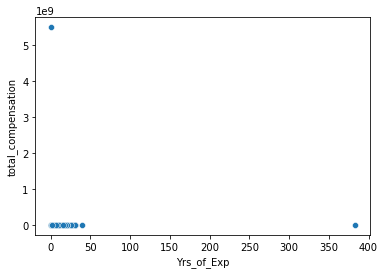

In [27]:

# Visualize the df

sns.scatterplot(x='Yrs_of_Exp', y='total_compensation', data=df)
plt.show()

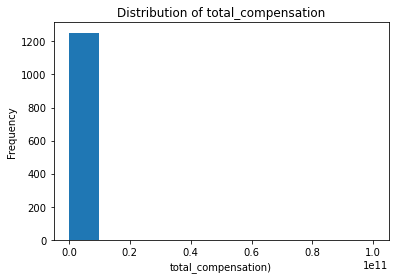

In [28]:

# Create a histogram
plt.hist(df['total_compensation'], bins=10)
plt.title('Distribution of total_compensation')
plt.xlabel('total_compensation)')
plt.ylabel('Frequency')
plt.show()

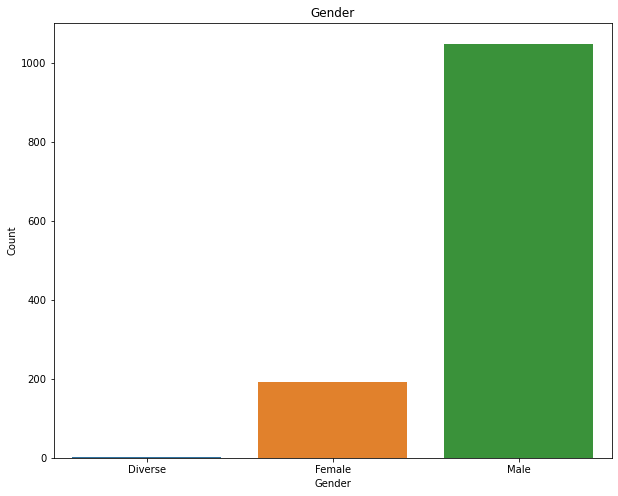

In [29]:
# Distribution of Gender
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Gender')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

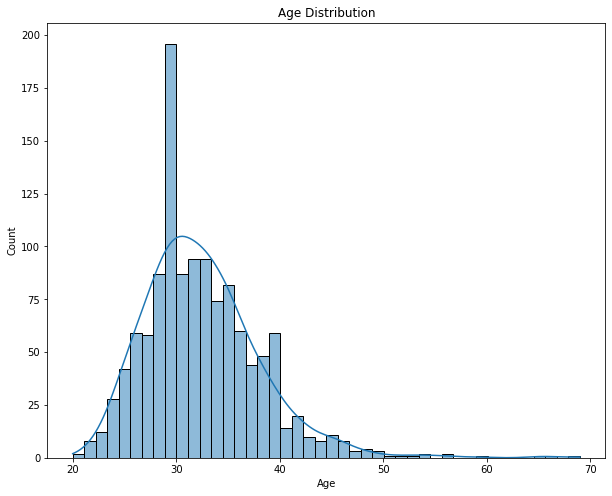

In [113]:
# Distribution of Age
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

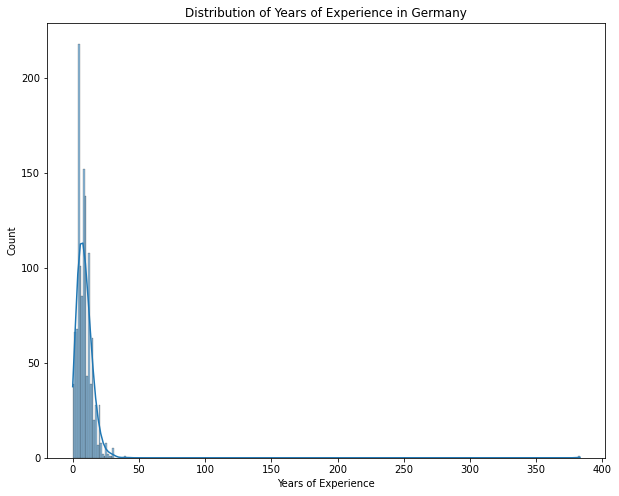

In [114]:
# Distribution of Years of Experience in Germany
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Yrs_of_Exp', kde=True)
plt.title('Distribution of Years of Experience in Germany')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

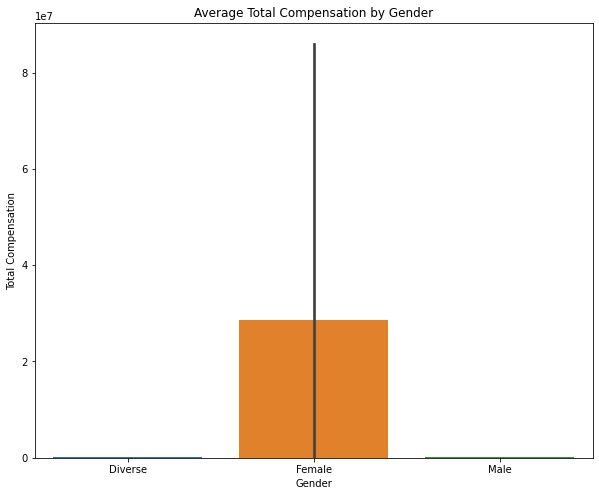

In [115]:
#  Salary by Gender
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='Gender', y='total_compensation')
plt.title('Average Total Compensation by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Compensation')
plt.show()

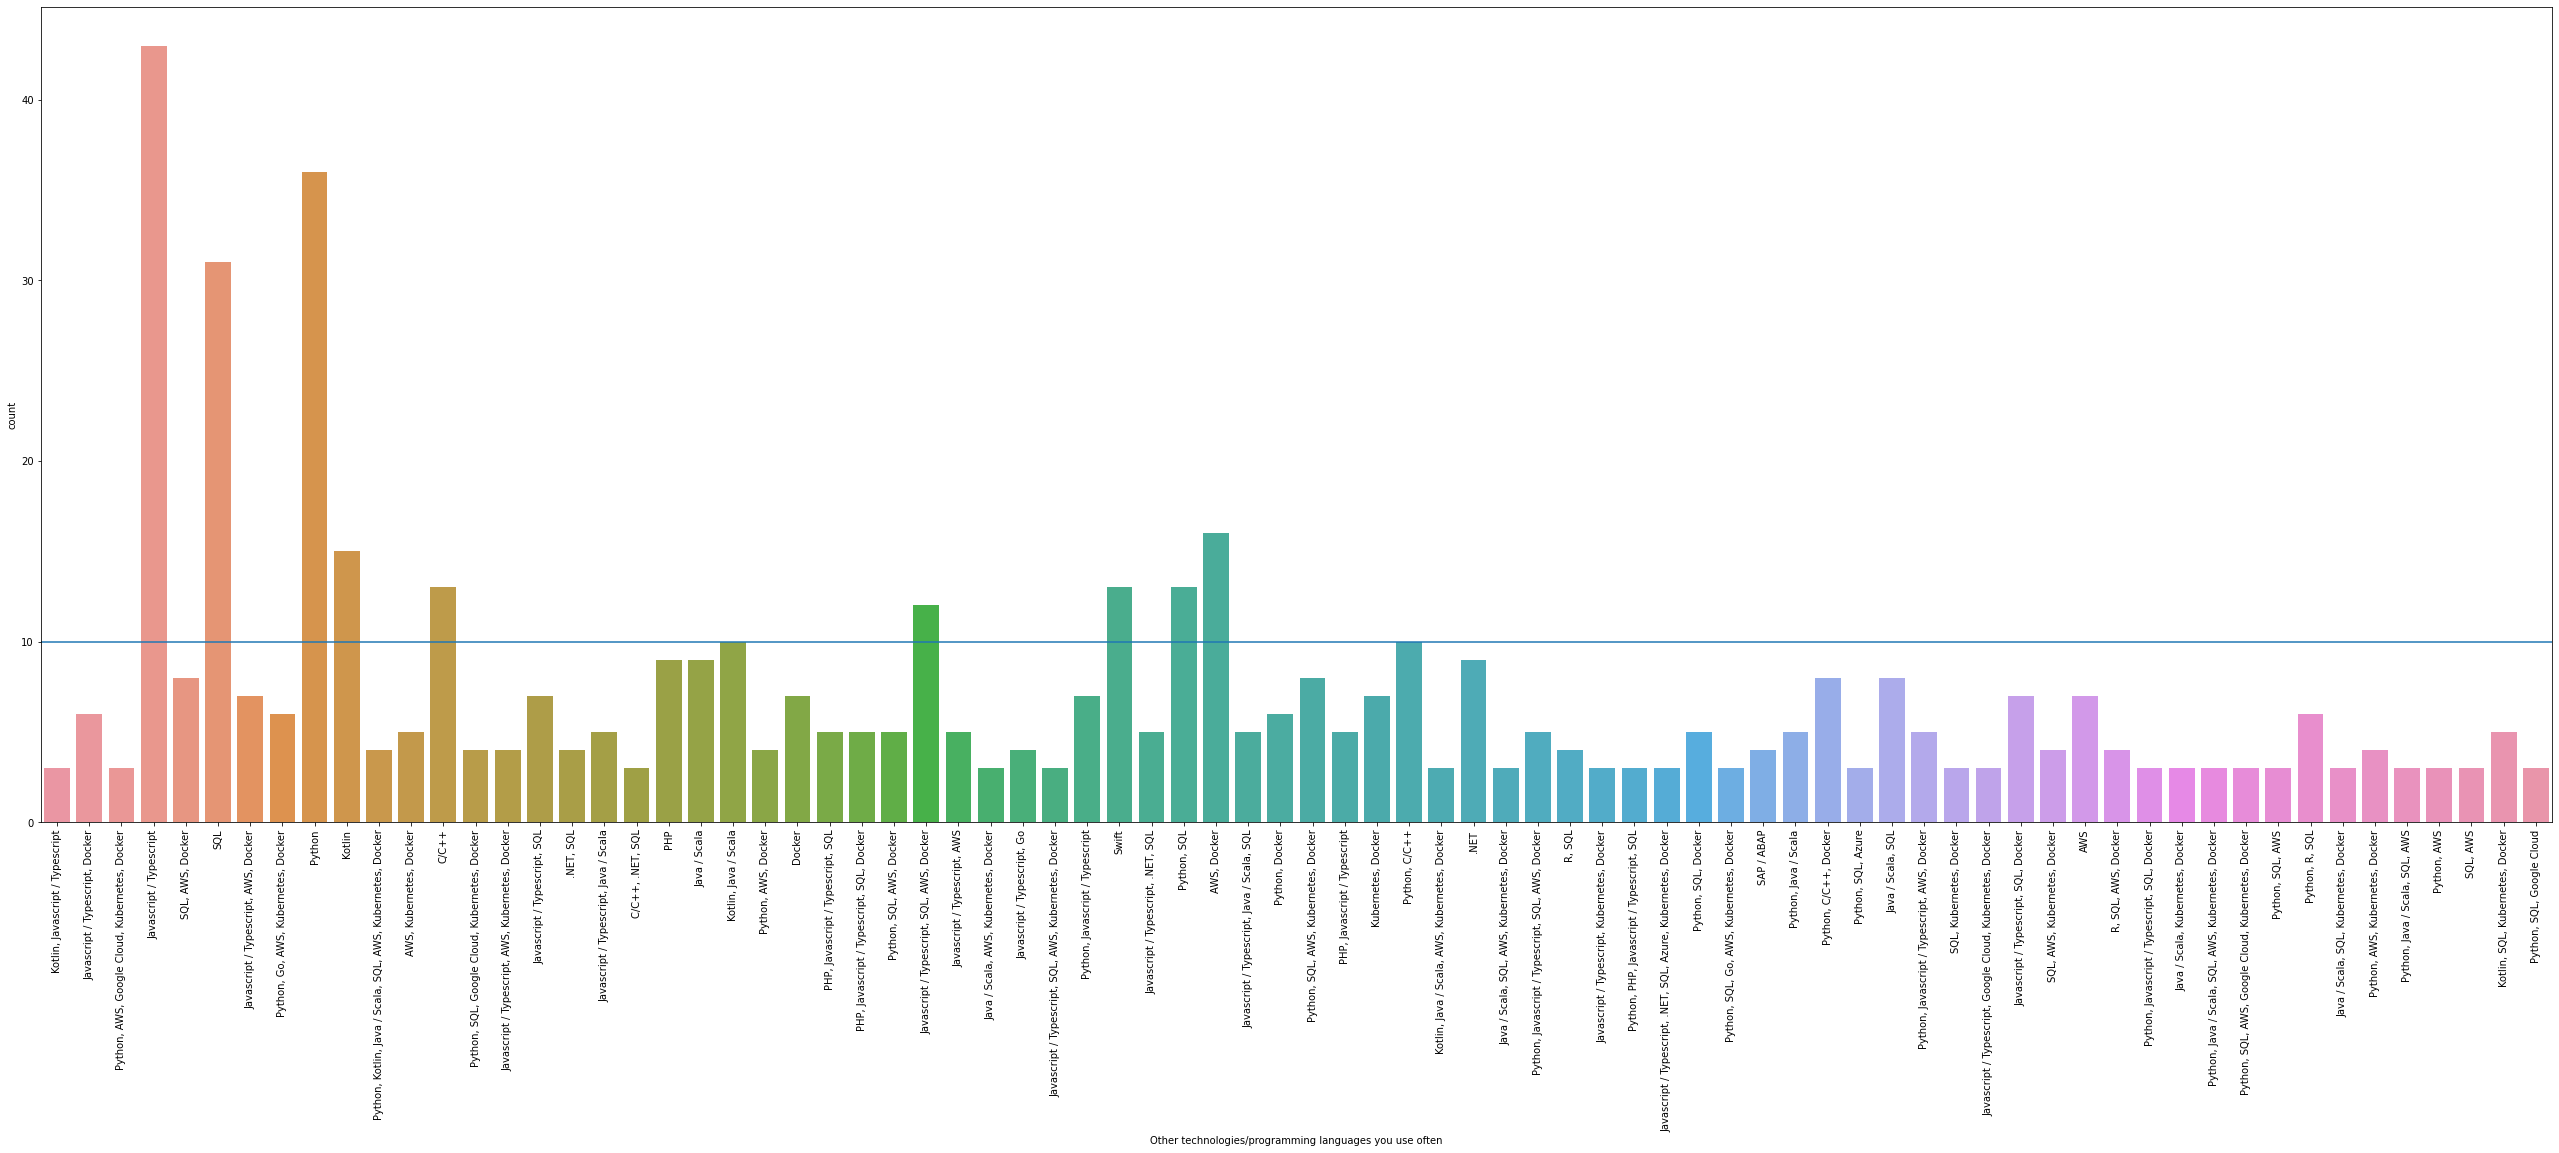

In [30]:
# Construct a temporary dataset with things that have > 2 records
# remove outliers
df1= df[df.groupby("Other technologies/programming languages you use often")["Other technologies/programming languages you use often"].transform('size') > 2]
df1= df1[df1["total_compensation"] < 250000]

plt.figure(figsize=(45,15))
ax = sns.countplot(x="Other technologies/programming languages you use often", data=df1)
ax.axhline(10)
ax.tick_params(axis='x', rotation=90)

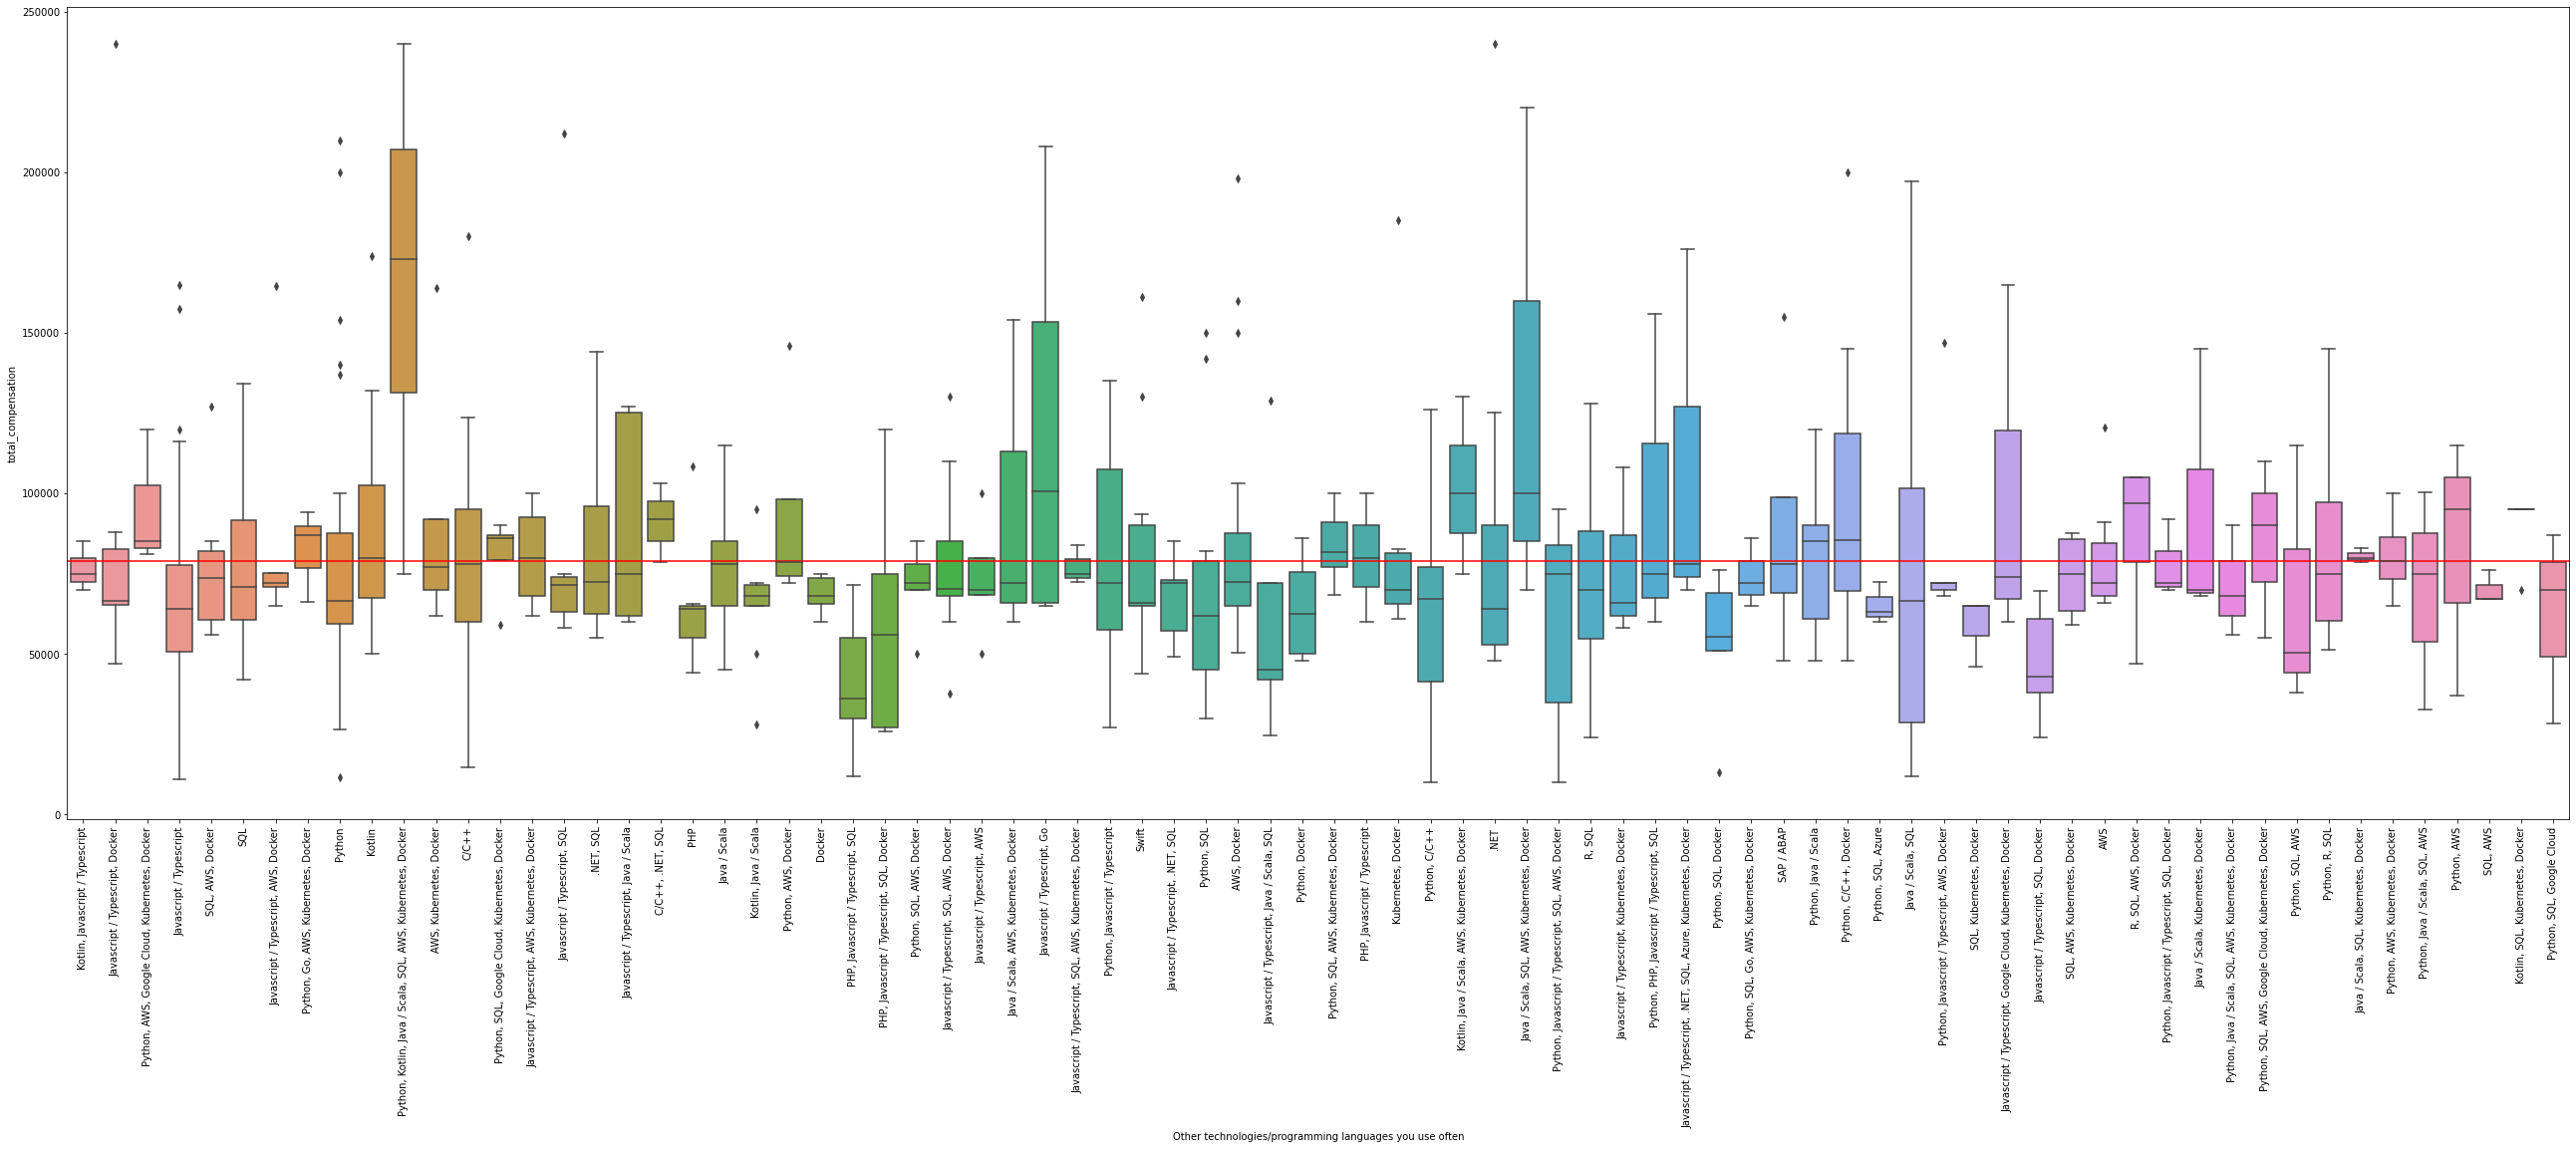

In [ ]:
plt.figure(figsize=(45,15))
ax = sns.boxplot(x="Other technologies/programming languages you use often", y="total_compensation", data=df1)
ax.axhline(df1["total_compensation"].mean(), color="red")
ax.tick_params(axis='x', rotation=90)

In [31]:
# Do the dummies
df_tmp = pd.get_dummies(df)
df_tmp.head(5)

,Age,Yrs_of_Exp,Yrs_of_Exp_Germany,Vacation_days,total_compensation,Gender_Diverse,Gender_Female,Gender_Male,City_Aachen,City_Amsterdam,...,Employment status_Intern,Employment status_Part-time employee,Employment status_Self-employed (freelancer),Employment status_Werkstudent,Employment status_Working Student,"Employment status_full-time, but 32 hours per week (it was my request, I'm a student)",Employment status_working student,Сontract duration_0,Сontract duration_Temporary contract,Сontract duration_Unlimited contract
0,26.0,5.0,3.0,30.0,85000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26.0,7.0,4.0,28.0,80000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,29.0,12.0,6.0,30.0,240000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,28.0,4.0,1.0,24.0,54000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,37.0,17.0,6.0,29.0,62000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
#X values in a DF
dfX = df.drop(columns={"total_compensation"})
dfY = df["total_compensation"]

#If we want an array for sklearn
y = np.array(dfY).reshape(-1,1)
x = np.array(dfX)
x.shape, y.shape

((1253, 11), (1253, 1))

In [33]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

X-Train: (877, 11)
X-Test: (376, 11)
Y-Train: (877, 1)
Y-Test: (376, 1)


In [ ]:
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

#Plot
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()
print('RMSE for Linear Regression=>',mean_squared_error(y,y_pred, squared=False))

# Answers and Explainations
(Expand/modify as needed)

### Results

### Feature Selection Activities

### Hyperparameter Changes